# Final Project: Earth Analytics Python Course, Spring 2020
## Steph Shepherd & Lauren Herwehe

In [30]:
# Import libraries
import warnings
from glob import glob
import os

import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
from shapely.geometry import Point, Polygon

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data', 'final-project-data'))

In [31]:
#Download data with figshare
#Ramsar sites
et.data.get_data(url='https://ndownloader.figshare.com/articles/12217679')

#Future dams
et.data.get_data(url='https://ndownloader.figshare.com/articles/12216467')

'/home/jovyan/earth-analytics/data/earthpy-downloads/12216467'

In [39]:
# Open the ramsar shapefile with geopandas
ramsar_areas = gpd.read_file(os.path.join("ramsar-boundaries", "features_publishedPolygon.shp"))

# Check the crs of the ramsar sites
print(ramsar_areas.crs)

# Open the dams csv files with pandas
fname = os.path.join("future-dams", "future_dams_2015.csv")
df = pd.read_csv(fname)

# Covert the pandas dataframe to a shapefile for plotting
geometry = [Point(xy) for xy in zip(df.Lon_Cleaned, df.LAT_cleaned)]
crs = {'init': 'epsg:4326'} 
geo_df = gdf(df, crs=crs, geometry=geometry)
geo_df.to_file(driver='ESRI Shapefile', filename='proposed_dams.shp')

proposed_dams = gpd.read_file("proposed_dams.shp")

epsg:4326


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(-189.3208207127645, 196.99981825066928, -61.58103382202385, 88.16581615650217)

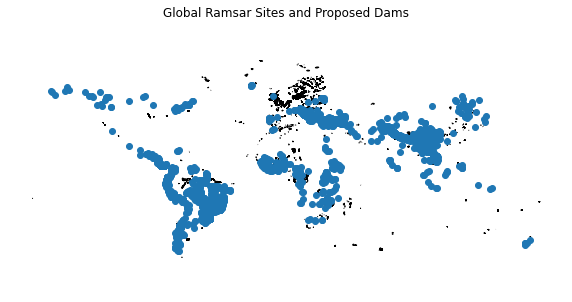

In [40]:
# Create a map of the dams and the ramsar sites
# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
ramsar_areas.plot(edgecolor="black",
                    facecolor='none',
                    ax=ax)

proposed_dams.plot(ax=ax)

ax.set(title='Global Ramsar Sites and Proposed Dams')
ax.set_axis_off()
plt.axis('equal')

In [27]:
# Create 5km and 10km buffer on dam points and check for overlap with ramsar polygons

In [ ]:
# STATS & PLOTS
# Global map of proposed dams and protected areas, then Zoom to a particular area
# Number of impacted areas per region (continent, country, river basin)
# Graph of number of dams proposed by year (or bins i.e. decades) or country?

